Open channel flow in pipes
===

This notebook looks for estimating the internal diameter of a sewer pipe, giving the maximum discharge that it can have as input. Warning: this is not programming. This is scripting. 

In [1]:
# Usual operations for controlling the work place
import os
os.getcwd()

'D:\\git\\jupyter\\lezioni'

Estimating the relative level of water flow. $\theta \in [0,2\pi]$ is the angle corresponding to certain filling degree $G \in [0,1] $ of the pipe. The optimal filling is aroung $G \sim [0.7,0.8]$

In [34]:
import math
#theta is the angle corresponding to certain filling degree G of the pipe

def G(theta):
    return 0.5*(1-math.cos(theta/2))

def theta(G):
    return 2*math.acos(1-2*G)


Below we estimate and plot $G$ vs $\theta$

Text(0.5, 0, 'angle (rad)')

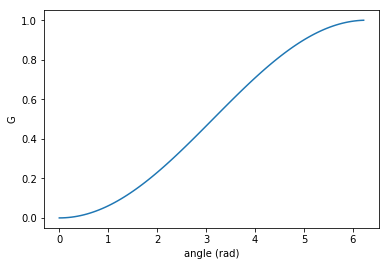

In [35]:
import numpy as np
%matplotlib inline
import matplotlib as plt

x = np.arange(0,2*math.pi,2*math.pi/100)

import pandas as pd

#Observe the use of the map function to avoid explicit use of for cycle

gg=pd.Series(list(map(G,x)),index=x)
ax=gg.plot()
ax.set_ylabel("G")
ax.set_xlabel("angle (rad)")

The estimation of $\theta$ vs $G$

Text(0.5, 0, 'G')

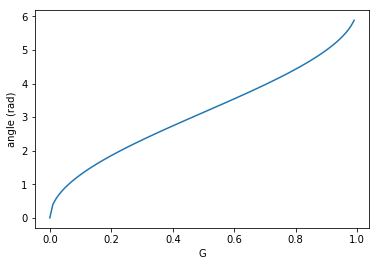

In [5]:
y=np.arange(0,1,0.01)
gl=pd.Series(list(map(theta,y)),index=y)
ax=gl.plot()
ax.set_ylabel("angle (rad)")
ax.set_xlabel("G")

Wet Area, wet Perimemeter and hydraulic radius

Text(0, 0.5, 'Area [m^2]')

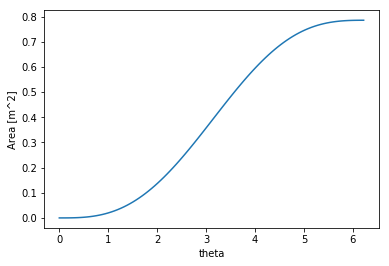

In [39]:
# Wet Area
def Omega(theta,D):
    return 0.125*D**2*(theta-math.sin(theta))

x = np.arange(0,2*math.pi,2*math.pi/100)
oo=pd.Series(map(Omega,x,[1]*100),index=x)
ax=oo.plot()
ax.set_xlabel("theta")
ax.set_ylabel("Area [m^2]")

Text(0, 0.5, 'Wet Perimeter')

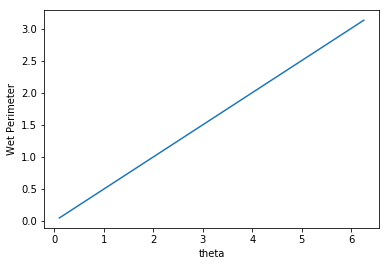

In [7]:
#Wetted perimeter 
def P(theta,D):
    return theta*D/2

#Hydraulic Radius
def Rh(theta,D):
    return (D/4)*(1-math.sin(theta)/theta)

x = np.arange(0.1,2*math.pi,2*math.pi/100)
oo=pd.Series(list(map(P,x,[1]*100)),index=x)
ax=oo.plot()
ax.set_xlabel("theta")
ax.set_ylabel("Wet Perimeter")

Hydraulic radius step by step

In [8]:
math.pi/2

1.5707963267948966

In [9]:
math.sin(math.pi/2)

1.0

In [10]:
bv=2*math.pi - 4*math.pi/4
(1-math.sin(bv)/(bv))/4

0.25

Hydraulic radius applying the Rh function

In [11]:
Rh(2*math.pi,1)

0.25

Text(0, 0.5, 'Hydraulic Radius')

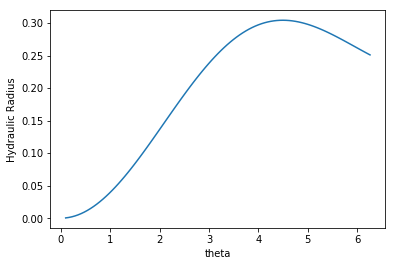

In [12]:
x = np.arange(0.1,2*math.pi,2*math.pi/100)
aa=pd.Series(list(map(Rh,x,[1]*100)),index=x)
ay=aa.plot()
ay.set_xlabel("theta")
ay.set_ylabel("Hydraulic Radius")

Estimating the diameter of a pipe/culvert assuming stationary hydraulic conditions. The formula is
$$ Q_{max} = k_s \Omega R_H^{2/3} i_f^{1/2} $$
where $Q_{max}$ is known. Therefore, considering the expression of $\Omega$ and $R_H$, we have:
$$ D = b\ \left[ \frac{2^{13/3} \frac{Q_{max}}{k_s\, i_f^{1/2}}}{(1-\frac{\sin \theta}{\theta})^{2/3}(\theta -\sin \theta)}\right]^{3/8} $$
In turn, it is
$$\theta = 2\, \cos^{-1} (1-G) $$
where $G$ is the relative level of water in pipes.

In [13]:
# The function that does it
#q is the discharge
#k is the Gauckler-Strickler coefficient
#i is the slope imposed to the pipe
#G is the degree of filling
def D(q,k,i,G):
    fac= 20.158736798317967
    num = fac*q/k/math.sqrt(i)
    theta = 2*math.acos(1-2*G)
    den = (1 - math.sin(theta)/theta)*(theta-math.sin(theta))
    return 10**(-9/8)*(num/den)**(3/8.)

In [14]:
D(1000,90,0.001,0.75)

1.0576379896915622

Freezing a function or diameters with the same parameters (except for discarges).

In [15]:
def dD(x):
    return D(x,90,0.001,0.75)

In [16]:
dD(1000)

1.0576379896915622

In [18]:
#import pandas as pd

idx=range(0,2010,10)
dmtrs=pd.Series(list(map(dD,idx)),index=idx)
dmtrs[-5:]

1960    1.361235
1970    1.363835
1980    1.366427
1990    1.369011
2000    1.371587
dtype: float64

Drawing the internal Diameters vs discharge

Text(0.5, 0, 'Discharge [l/s]')

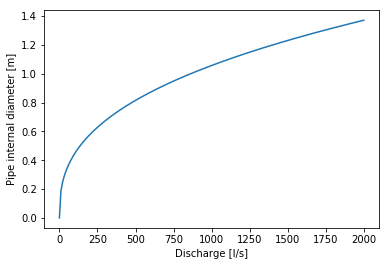

In [19]:
#%matplotlib inline
#import matplotlib as plt
ax=dmtrs.plot()
ax.set_ylabel("Pipe internal diameter [m]")
ax.set_xlabel("Discharge [l/s]")

In [20]:
D(760,90,0.001,0.75)

0.9542059913390688

Once the diameter is known, the relative level of water in pipes can be obtained by inverting the "moto uniforme" law. This gives:
$$ (1-\frac{\sin \theta}{\theta})^{2/3}(\theta-\sin \theta) = 2^{13/3} \left(\frac{b}{D}\right)^{8/3}\frac{Q_{max}}{i_f^{1/2} k_s}$$

In [27]:
# lhs term
# theta: angle at center
def g_1(theta):
    return (1-math.sin(theta)/theta)**(2/3)*(theta -math.sin(theta))

In [28]:
#rhs term
# D: diameter of the pipe
# q: maximum discharge
# i: slope imposed to the pipe
# k: Gauckler-Strikler coefficient
def g_2(D,q,i,k):
    fac=20.158736798317967
    b=10**(-9/8)
    return fac*((b/D)**(8/3))*q/(math.sqrt(i)*k)

Text(0.5, 0, 'theta')

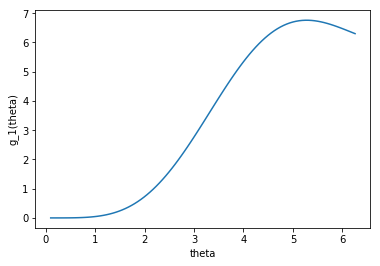

In [29]:
#Drawing g_1 against theta

ts=np.arange(0.1,2*math.pi,2*math.pi/100)
ax=pd.Series(list(map(g_1,ts)),index=ts).plot()
ax.set_ylabel("g_1(theta)")
ax.set_xlabel("theta")

That's the table of the r.h.s. of the above  equation

In [24]:
rhs=pd.Series(list(map(g_1,ts)),index=ts)

In [25]:
g_2(1,760,0.001,90)

5.383124167360747

Text(0.5, 0, 'theta')

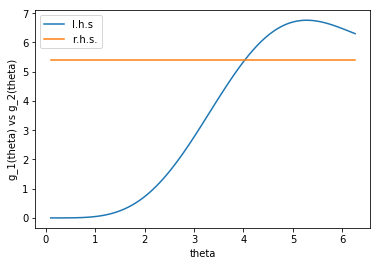

In [26]:
ts=np.arange(0.1,2*math.pi,2*math.pi/100)
gg=pd.DataFrame(list(map(g_1,ts)),index=ts,columns=["l.h.s"])
gg["r.h.s."]=g_2(1,760,0.001,90)
ax=gg.plot()
ax.set_ylabel("g_1(theta) vs g_2(theta)")
ax.set_xlabel("theta")

In [40]:
gg[3.5:4.5]

,l.h.s,r.h.s.
3.555752,4.251448,5.383124
3.618584,4.415687,5.383124
3.681416,4.577331,5.383124
3.744247,4.735876,5.383124
3.807079,4.890830,5.383124
3.869911,5.041722,5.383124
3.932743,5.188103,5.383124
3.995575,5.329546,5.383124
4.058407,5.465652,5.383124
4.121239,5.596053,5.383124


So our angle is between [3.995575,4.058407] radiants which correspond to

In [45]:
list(map(G,[3.995575,4.058407] ))

[0.7070669995400872, 0.7212601439858557]

In [50]:
G(3.995575)

0.7070669995400872